## Exploratory Data Analysis on Parkinson's Disease Dataset

This dataset is related to Parkinson's disease detection using voice recordings. It includes various vocal attributes extracted from speech signals, which are useful in distinguishing individuals with Parkinson’s disease from healthy individuals

### Feature Description:
1. name – The identifier for each voice recording.
2. MDVP:Fo(Hz) – Fundamental frequency of the voice (in Hz).
3. MDVP:Fhi(Hz) – Highest frequency in the voice sample (in Hz).
4. MDVP:Flo(Hz) – Lowest frequency in the voice sample (in Hz).
5. Jitter-Related Features: (Measures variations in frequency)
   - MDVP:Jitter(%)
   - MDVP:Jitter(Abs)
   - MDVP:RAP
   - MDVP:PPQ
   - Jitter:DDP
6. Shimmer-Related Features: (Measures variations in amplitude)
   - MDVP:Shimmer
   - MDVP:Shimmer(dB)
   - Shimmer:APQ3
   - Shimmer:APQ5
   - MDVP:APQ
   - Shimmer:DDA
7. Noise-to-Harmonics Ratio (NHR) & Harmonics-to-Noise Ratio (HNR):
   - NHR – Measures noise levels in the voice signal.
   - HNR – Measures the proportion of harmonic (clear) sound vs. noise.
8. status – Binary value (1 for Parkinson’s, 0 for Healthy).
9. Nonlinear Dynamical Complexity Measures:
    - RPDE (Recurrence Period Density Entropy)
    - DFA (Detrended Fluctuation Analysis)
    - spread1 & spread2 – Measures of signal spread and variation.
    - D2 – Correlation dimension (measures signal complexity).
    - PPE (Pitch Period Entropy) – Measures variations in pitch.

#### importing important libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### reading data

In [2]:
# data is stored in 'df' variable
df=pd.read_csv("C:\\Users\\91876\\Desktop\\project8\\project\\parkinsons.csv")

### head
used to give first 5 observation of data

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### tail
give last 5 observation of data

In [4]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


### shape
give a shape in form of rows and column

In [5]:
df.shape

(195, 24)

### columns
give a list of names of columns

In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### dtypes 
give data type for each column

In [7]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

### info
give column wise general information about our data like not null values count, memory usage, data type etc

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### isnull 

In [9]:
df.isnull().head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#isnull().sum()
# give the sum of null values in each columns
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
# there is no null value is any column

In [12]:
# isnull().sum().sum()
# give sum of null values in entire data
df.isnull().sum().sum()

0

In [13]:
# there is no null values in entire dataset

### duplicated
indicate duplicate entry in dataset

In [14]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool

In [15]:
# duplicated().sum()
# indicate number of duplicate value in our data set
df.duplicated().sum()

0

In [16]:
# there is no duplicate values in our data

### describe
provides summary statistics of numerical columns

In [17]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### unique 
used to find all the unique values in a column 

In [18]:
df.columns[0], df[df.columns[0]].unique()

('name',
 array(['phon_R01_S01_1', 'phon_R01_S01_2', 'phon_R01_S01_3',
        'phon_R01_S01_4', 'phon_R01_S01_5', 'phon_R01_S01_6',
        'phon_R01_S02_1', 'phon_R01_S02_2', 'phon_R01_S02_3',
        'phon_R01_S02_4', 'phon_R01_S02_5', 'phon_R01_S02_6',
        'phon_R01_S04_1', 'phon_R01_S04_2', 'phon_R01_S04_3',
        'phon_R01_S04_4', 'phon_R01_S04_5', 'phon_R01_S04_6',
        'phon_R01_S05_1', 'phon_R01_S05_2', 'phon_R01_S05_3',
        'phon_R01_S05_4', 'phon_R01_S05_5', 'phon_R01_S05_6',
        'phon_R01_S06_1', 'phon_R01_S06_2', 'phon_R01_S06_3',
        'phon_R01_S06_4', 'phon_R01_S06_5', 'phon_R01_S06_6',
        'phon_R01_S07_1', 'phon_R01_S07_2', 'phon_R01_S07_3',
        'phon_R01_S07_4', 'phon_R01_S07_5', 'phon_R01_S07_6',
        'phon_R01_S08_1', 'phon_R01_S08_2', 'phon_R01_S08_3',
        'phon_R01_S08_4', 'phon_R01_S08_5', 'phon_R01_S08_6',
        'phon_R01_S10_1', 'phon_R01_S10_2', 'phon_R01_S10_3',
        'phon_R01_S10_4', 'phon_R01_S10_5', 'phon_R01_S10_6',

In [19]:
df.columns[1], df[df.columns[1]].unique()

('MDVP:Fo(Hz)',
 array([119.992, 122.4  , 116.682, 116.676, 116.014, 120.552, 120.267,
        107.332,  95.73 ,  95.056,  88.333,  91.904, 136.926, 139.173,
        152.845, 142.167, 144.188, 168.778, 153.046, 156.405, 153.848,
        153.88 , 167.93 , 173.917, 163.656, 104.4  , 171.041, 146.845,
        155.358, 162.568, 197.076, 199.228, 198.383, 202.266, 203.184,
        201.464, 177.876, 176.17 , 180.198, 187.733, 186.163, 184.055,
        237.226, 241.404, 243.439, 242.852, 245.51 , 252.455, 122.188,
        122.964, 124.445, 126.344, 128.001, 129.336, 108.807, 109.86 ,
        110.417, 117.274, 116.879, 114.847, 209.144, 223.365, 222.236,
        228.832, 229.401, 228.969, 140.341, 136.969, 143.533, 148.09 ,
        142.729, 136.358, 120.08 , 112.014, 110.793, 110.707, 112.876,
        110.568,  95.385, 100.77 ,  96.106,  95.605, 100.96 ,  98.804,
        176.858, 180.978, 178.222, 176.281, 173.898, 179.711, 166.605,
        151.955, 148.272, 152.125, 157.821, 157.447, 159.116,

In [20]:
df.columns[2], df[df.columns[2]].unique()

('MDVP:Fhi(Hz)',
 array([157.302, 148.65 , 131.111, 137.871, 141.781, 131.162, 137.244,
        113.84 , 132.068, 120.103, 112.24 , 115.871, 159.866, 179.139,
        163.305, 217.455, 349.259, 232.181, 175.829, 189.398, 165.738,
        172.86 , 193.221, 192.735, 200.841, 206.002, 208.313, 208.701,
        227.383, 198.346, 206.896, 209.512, 215.203, 211.604, 211.526,
        210.565, 192.921, 185.604, 201.249, 202.324, 197.724, 196.537,
        247.326, 248.834, 250.912, 255.034, 262.09 , 261.487, 128.611,
        130.049, 135.069, 134.231, 138.052, 139.867, 134.656, 126.358,
        131.067, 129.916, 131.897, 271.314, 237.494, 238.987, 231.345,
        234.619, 252.221, 239.541, 159.774, 166.607, 162.215, 162.824,
        162.408, 176.595, 139.71 , 588.518, 128.101, 122.611, 148.826,
        125.394, 102.145, 115.697, 108.664, 107.715, 110.019, 102.305,
        205.56 , 200.125, 202.45 , 227.381, 211.35 , 225.93 , 206.008,
        163.335, 164.989, 161.469, 172.975, 163.267, 168.913

In [21]:
df.columns[3], df[df.columns[3]].unique()

('MDVP:Flo(Hz)',
 array([ 74.997, 113.819, 111.555, 111.366, 110.655, 113.787, 114.82 ,
        104.315,  91.754,  91.226,  84.072,  86.292, 131.276,  76.556,
         75.836,  83.159,  82.764,  75.603,  68.623, 142.822,  65.782,
         78.128,  79.068,  86.18 ,  76.779,  77.968,  75.501,  81.737,
         80.055,  77.63 , 192.055, 192.091, 193.104, 197.079, 196.16 ,
        195.708, 168.013, 163.564, 175.456, 173.015, 177.584, 166.977,
        225.227, 232.483, 232.435, 227.911, 231.848, 182.786, 115.765,
        114.676, 117.495, 112.773, 122.08 , 118.604, 102.874, 104.437,
        103.37 , 110.402, 108.153, 104.68 , 109.379,  98.664, 205.495,
        223.634, 221.156, 113.201,  67.021,  66.004,  65.809,  67.343,
         65.476,  65.75 , 111.208, 107.024, 107.316, 105.007, 106.981,
        106.821,  90.264,  85.545,  84.51 ,  87.549,  95.628,  87.804,
         75.344, 155.495, 141.047, 125.61 ,  74.677, 144.878,  78.032,
        147.226, 142.299,  76.596,  68.401, 149.605, 144.811

In [22]:
df.columns[4], df[df.columns[4]].unique()

('MDVP:Jitter(%)',
 array([0.00784, 0.00968, 0.0105 , 0.00997, 0.01284, 0.00333, 0.0029 ,
        0.00551, 0.00532, 0.00505, 0.0054 , 0.00293, 0.0039 , 0.00294,
        0.00369, 0.00544, 0.00718, 0.00742, 0.00768, 0.0084 , 0.0048 ,
        0.00442, 0.00476, 0.00633, 0.00455, 0.00496, 0.0031 , 0.00502,
        0.00289, 0.00241, 0.00212, 0.0018 , 0.00178, 0.00198, 0.00411,
        0.00284, 0.00316, 0.00298, 0.00258, 0.00281, 0.0021 , 0.00225,
        0.00235, 0.00185, 0.00524, 0.00428, 0.00431, 0.00448, 0.00436,
        0.0049 , 0.00761, 0.00874, 0.00752, 0.00788, 0.00867, 0.00282,
        0.00264, 0.00266, 0.00296, 0.00205, 0.00238, 0.00817, 0.00923,
        0.01101, 0.00762, 0.00831, 0.00971, 0.00405, 0.00533, 0.00494,
        0.00516, 0.005  , 0.00462, 0.00608, 0.01038, 0.00694, 0.00702,
        0.00606, 0.00432, 0.00747, 0.00406, 0.00321, 0.0052 , 0.00709,
        0.00419, 0.00459, 0.00382, 0.00358, 0.00342, 0.0128 , 0.01378,
        0.01936, 0.03316, 0.01551, 0.03011, 0.00248, 0.001

In [23]:
df.columns[5], df[df.columns[5]].unique()

('MDVP:Jitter(Abs)',
 array([7.0e-05, 8.0e-05, 9.0e-05, 1.1e-04, 3.0e-05, 6.0e-05, 2.0e-05,
        4.0e-05, 5.0e-05, 1.0e-05, 9.0e-06, 7.0e-06, 1.0e-04, 1.5e-04,
        2.6e-04, 1.2e-04, 2.2e-04, 1.6e-04, 1.4e-04]))

In [24]:
df.columns[6], df[df.columns[6]].unique()

('MDVP:RAP',
 array([0.0037 , 0.00465, 0.00544, 0.00502, 0.00655, 0.00463, 0.00155,
        0.00144, 0.00293, 0.00268, 0.00254, 0.00281, 0.00118, 0.00165,
        0.00121, 0.00157, 0.00211, 0.00284, 0.00364, 0.00372, 0.00428,
        0.00232, 0.0022 , 0.00221, 0.0038 , 0.00316, 0.0025 , 0.00159,
        0.0028 , 0.00166, 0.00134, 0.00113, 0.00093, 0.00094, 0.00105,
        0.00233, 0.00205, 0.00153, 0.00168, 0.00169, 0.00109, 0.00117,
        0.00127, 0.00092, 0.00124, 0.00141, 0.00131, 0.00137, 0.00349,
        0.00398, 0.00352, 0.00299, 0.00334, 0.00373, 0.00147, 0.00154,
        0.00152, 0.00175, 0.00114, 0.00136, 0.0043 , 0.00507, 0.00647,
        0.00467, 0.00469, 0.00534, 0.0018 , 0.0026 , 0.00277, 0.0027 ,
        0.00226, 0.00331, 0.00622, 0.00389, 0.00351, 0.00247, 0.00418,
        0.00163, 0.00287, 0.00237, 0.00391, 0.00387, 0.00224, 0.00191,
        0.00196, 0.00201, 0.00178, 0.00743, 0.00826, 0.01159, 0.02144,
        0.00905, 0.01854, 0.00076, 0.00116, 0.00068, 0.00115, 0.

In [25]:
df.columns[7], df[df.columns[7]].unique()

('MDVP:PPQ',
 array([0.00554, 0.00696, 0.00781, 0.00698, 0.00908, 0.0075 , 0.00202,
        0.00182, 0.00332, 0.0033 , 0.00336, 0.00153, 0.00208, 0.00149,
        0.00203, 0.00292, 0.00387, 0.00432, 0.00399, 0.0045 , 0.00267,
        0.00247, 0.00258, 0.0039 , 0.00375, 0.00234, 0.00275, 0.00176,
        0.00253, 0.00168, 0.00138, 0.00135, 0.00107, 0.00106, 0.00115,
        0.00241, 0.00218, 0.00166, 0.00175, 0.00147, 0.00173, 0.00137,
        0.00139, 0.00148, 0.00113, 0.00155, 0.00167, 0.00169, 0.00183,
        0.00486, 0.00539, 0.00514, 0.00469, 0.00493, 0.0052 , 0.00152,
        0.00151, 0.00144, 0.0014 , 0.0044 , 0.00463, 0.00467, 0.00354,
        0.00419, 0.00478, 0.0022 , 0.00329, 0.00283, 0.00289, 0.0028 ,
        0.00576, 0.00415, 0.00371, 0.00348, 0.0042 , 0.00244, 0.00194,
        0.00312, 0.00254, 0.00453, 0.00227, 0.00256, 0.00226, 0.00196,
        0.00197, 0.00184, 0.00623, 0.00655, 0.0099 , 0.01522, 0.00909,
        0.01628, 0.00136, 0.001  , 0.00134, 0.00092, 0.00122, 0.

In [26]:
df.columns[8], df[df.columns[8]].unique()

('Jitter:DDP',
 array([0.01109, 0.01394, 0.01633, 0.01505, 0.01966, 0.01388, 0.00466,
        0.00431, 0.0088 , 0.00803, 0.00763, 0.00844, 0.00355, 0.00496,
        0.00364, 0.00471, 0.00632, 0.00853, 0.01092, 0.01116, 0.01285,
        0.00696, 0.00661, 0.00663, 0.0114 , 0.00948, 0.0075 , 0.00749,
        0.00476, 0.00841, 0.00498, 0.00402, 0.00339, 0.00278, 0.00283,
        0.00314, 0.007  , 0.00616, 0.00459, 0.00504, 0.00403, 0.00507,
        0.0047 , 0.00327, 0.0035 , 0.0038 , 0.00276, 0.00373, 0.00422,
        0.00393, 0.00411, 0.00495, 0.01046, 0.01193, 0.01056, 0.00898,
        0.01003, 0.0112 , 0.00442, 0.00461, 0.00457, 0.00526, 0.00342,
        0.00408, 0.01289, 0.0152 , 0.01941, 0.014  , 0.01407, 0.01601,
        0.0054 , 0.00805, 0.0078 , 0.00831, 0.0081 , 0.00677, 0.00994,
        0.01865, 0.01168, 0.01283, 0.01053, 0.00742, 0.01254, 0.00659,
        0.00488, 0.00862, 0.0071 , 0.01172, 0.01161, 0.00672, 0.00574,
        0.00587, 0.00602, 0.00535, 0.02228, 0.02478, 0.03476, 

In [27]:
df.columns[9], df[df.columns[9]].unique()

('MDVP:Shimmer',
 array([0.04374, 0.06134, 0.05233, 0.05492, 0.06425, 0.04701, 0.01608,
        0.01567, 0.02093, 0.02838, 0.02143, 0.02752, 0.01259, 0.01642,
        0.01828, 0.01503, 0.02047, 0.03327, 0.05517, 0.03995, 0.0381 ,
        0.04137, 0.04351, 0.04192, 0.01659, 0.03767, 0.01966, 0.01919,
        0.01718, 0.01791, 0.01098, 0.01015, 0.01263, 0.00954, 0.00958,
        0.01194, 0.02126, 0.01851, 0.01444, 0.01663, 0.01495, 0.01463,
        0.01752, 0.0176 , 0.01419, 0.01494, 0.01152, 0.01613, 0.01681,
        0.02184, 0.02033, 0.02297, 0.02498, 0.02719, 0.03209, 0.03715,
        0.02293, 0.02645, 0.03225, 0.01861, 0.01906, 0.01643, 0.01644,
        0.01457, 0.01745, 0.03198, 0.03111, 0.05384, 0.05428, 0.03485,
        0.04978, 0.01706, 0.02448, 0.02442, 0.02215, 0.03999, 0.02199,
        0.03202, 0.03121, 0.04024, 0.03156, 0.02427, 0.02223, 0.04795,
        0.03852, 0.03759, 0.06511, 0.06727, 0.04313, 0.0664 , 0.07959,
        0.0419 , 0.05925, 0.03716, 0.03272, 0.03381, 0.03886

In [28]:
df.columns[10], df[df.columns[10]].unique()

('MDVP:Shimmer(dB)',
 array([0.426, 0.626, 0.482, 0.517, 0.584, 0.456, 0.14 , 0.134, 0.191,
        0.255, 0.197, 0.249, 0.112, 0.154, 0.158, 0.126, 0.192, 0.348,
        0.542, 0.328, 0.37 , 0.377, 0.364, 0.164, 0.381, 0.186, 0.198,
        0.161, 0.168, 0.097, 0.089, 0.111, 0.085, 0.107, 0.189, 0.131,
        0.151, 0.135, 0.132, 0.141, 0.103, 0.143, 0.185, 0.21 , 0.228,
        0.307, 0.334, 0.221, 0.265, 0.35 , 0.17 , 0.165, 0.145, 0.129,
        0.313, 0.308, 0.478, 0.497, 0.365, 0.483, 0.152, 0.226, 0.216,
        0.206, 0.263, 0.361, 0.296, 0.202, 0.435, 0.331, 0.327, 0.58 ,
        0.65 , 0.442, 0.634, 0.772, 0.383, 0.637, 0.283, 0.342, 0.422,
        0.659, 0.891, 0.93 , 0.094, 0.137, 0.093, 0.275, 0.207, 0.155,
        0.149, 0.209, 0.235, 0.148, 0.175, 0.124, 0.117, 0.441, 0.231,
        0.224, 0.233, 0.246, 0.257, 0.098, 0.09 , 0.125, 0.138, 0.106,
        0.099, 0.379, 0.431, 0.476, 0.267, 0.281, 0.571, 0.297, 0.18 ,
        0.225, 0.821, 0.618, 0.722, 0.833, 0.784, 1.302,

In [29]:
df.columns[11], df[df.columns[11]].unique()

('Shimmer:APQ3',
 array([0.02182, 0.03134, 0.02757, 0.02924, 0.0349 , 0.02328, 0.00779,
        0.00829, 0.01073, 0.01441, 0.01079, 0.01424, 0.00656, 0.00728,
        0.01064, 0.00772, 0.00969, 0.02471, 0.01721, 0.01667, 0.02021,
        0.02228, 0.02187, 0.00738, 0.01732, 0.00889, 0.00883, 0.00769,
        0.00793, 0.00563, 0.00504, 0.0064 , 0.00469, 0.00468, 0.00586,
        0.01154, 0.00938, 0.00726, 0.00774, 0.00742, 0.01035, 0.01006,
        0.00777, 0.00847, 0.00906, 0.00614, 0.00855, 0.0093 , 0.01241,
        0.01143, 0.01323, 0.01396, 0.01483, 0.01789, 0.02032, 0.01189,
        0.01394, 0.01805, 0.00975, 0.01013, 0.00867, 0.00882, 0.00942,
        0.0183 , 0.01638, 0.03152, 0.03357, 0.01868, 0.02749, 0.00974,
        0.01373, 0.01432, 0.01284, 0.02413, 0.01803, 0.01773, 0.02266,
        0.01792, 0.01371, 0.01277, 0.02679, 0.02107, 0.02073, 0.03671,
        0.03788, 0.02297, 0.0365 , 0.04421, 0.02383, 0.03341, 0.02062,
        0.01813, 0.01806, 0.02135, 0.02542, 0.03611, 0.05358

In [30]:
df.columns[12], df[df.columns[12]].unique()

('Shimmer:APQ5',
 array([0.0313 , 0.04518, 0.03858, 0.04005, 0.04825, 0.03526, 0.00937,
        0.00946, 0.01277, 0.01725, 0.01342, 0.01641, 0.00717, 0.00932,
        0.00972, 0.00888, 0.012  , 0.01893, 0.03572, 0.02374, 0.02383,
        0.02591, 0.0254 , 0.0247 , 0.00948, 0.02245, 0.01169, 0.01144,
        0.01012, 0.01057, 0.0068 , 0.00641, 0.00825, 0.00606, 0.0061 ,
        0.0076 , 0.01347, 0.0116 , 0.00885, 0.01003, 0.00941, 0.00901,
        0.01024, 0.01038, 0.00898, 0.00879, 0.00977, 0.0073 , 0.00776,
        0.00802, 0.00959, 0.01072, 0.01219, 0.01609, 0.01992, 0.02302,
        0.01459, 0.01625, 0.01974, 0.01258, 0.01296, 0.01108, 0.01075,
        0.00957, 0.0181 , 0.01759, 0.02422, 0.02494, 0.01906, 0.02466,
        0.00925, 0.01375, 0.01325, 0.02231, 0.01199, 0.01886, 0.01783,
        0.02451, 0.01841, 0.01421, 0.01343, 0.03022, 0.02493, 0.02415,
        0.04159, 0.04254, 0.02768, 0.04282, 0.04962, 0.02521, 0.03794,
        0.02321, 0.01909, 0.02024, 0.02174, 0.0263 , 0.03963

In [31]:
df.columns[13], df[df.columns[13]].unique()

('MDVP:APQ',
 array([0.02971, 0.04368, 0.0359 , 0.03772, 0.04465, 0.03243, 0.01351,
        0.01256, 0.01717, 0.02444, 0.01892, 0.02214, 0.0114 , 0.01797,
        0.01246, 0.01359, 0.02074, 0.0343 , 0.05767, 0.0431 , 0.04055,
        0.04525, 0.04246, 0.01497, 0.0378 , 0.01872, 0.01826, 0.01661,
        0.01799, 0.00802, 0.00762, 0.00951, 0.00719, 0.00726, 0.00957,
        0.01612, 0.01491, 0.0119 , 0.01366, 0.01233, 0.01234, 0.01133,
        0.01251, 0.01033, 0.01014, 0.01149, 0.0086 , 0.01433, 0.014  ,
        0.01685, 0.01614, 0.01677, 0.01947, 0.02067, 0.02454, 0.02802,
        0.01948, 0.02137, 0.02519, 0.01382, 0.0134 , 0.012  , 0.01179,
        0.01016, 0.02428, 0.02603, 0.03392, 0.03635, 0.02949, 0.03736,
        0.01345, 0.01956, 0.01831, 0.01715, 0.02704, 0.01636, 0.02455,
        0.02139, 0.02876, 0.0219 , 0.01751, 0.01552, 0.0351 , 0.02877,
        0.02784, 0.04683, 0.04802, 0.03455, 0.05114, 0.0569 , 0.03051,
        0.04398, 0.02764, 0.02571, 0.02809, 0.03088, 0.03908, 0.

In [32]:
df.columns[14], df[df.columns[14]].unique()

('Shimmer:DDA',
 array([0.06545, 0.09403, 0.0827 , 0.08771, 0.1047 , 0.06985, 0.02337,
        0.02487, 0.03218, 0.04324, 0.03237, 0.04272, 0.01968, 0.02184,
        0.03191, 0.02316, 0.02908, 0.04322, 0.07413, 0.05164, 0.05   ,
        0.06062, 0.06685, 0.06562, 0.02214, 0.05197, 0.02666, 0.0265 ,
        0.02307, 0.0238 , 0.01689, 0.01513, 0.01919, 0.01407, 0.01403,
        0.01758, 0.03463, 0.02814, 0.02177, 0.02488, 0.02321, 0.02226,
        0.03104, 0.03017, 0.0233 , 0.02542, 0.02719, 0.01841, 0.02566,
        0.02789, 0.03724, 0.03429, 0.03969, 0.04188, 0.0445 , 0.05368,
        0.06097, 0.03568, 0.04183, 0.05414, 0.02925, 0.03039, 0.02602,
        0.02647, 0.02308, 0.02827, 0.0549 , 0.04914, 0.09455, 0.1007 ,
        0.05605, 0.08247, 0.02921, 0.0412 , 0.04295, 0.03851, 0.07238,
        0.03852, 0.05408, 0.0532 , 0.06799, 0.05377, 0.04114, 0.03831,
        0.08037, 0.06321, 0.06219, 0.11012, 0.11363, 0.06892, 0.10949,
        0.13262, 0.0715 , 0.10024, 0.06185, 0.05439, 0.05417,

In [33]:
df.columns[15], df[df.columns[15]].unique()

('NHR',
 array([0.02211, 0.01929, 0.01309, 0.01353, 0.01767, 0.01222, 0.00607,
        0.00344, 0.0107 , 0.01022, 0.01166, 0.01141, 0.00581, 0.01041,
        0.00609, 0.00839, 0.01859, 0.02919, 0.0316 , 0.03365, 0.03871,
        0.01849, 0.0128 , 0.0184 , 0.01778, 0.02887, 0.01095, 0.01328,
        0.00677, 0.0117 , 0.00339, 0.00167, 0.00119, 0.00072, 0.00065,
        0.00135, 0.00586, 0.0034 , 0.00231, 0.00265, 0.00257, 0.0074 ,
        0.00675, 0.00454, 0.00476, 0.00432, 0.00462, 0.00479, 0.00474,
        0.00481, 0.00484, 0.01036, 0.0118 , 0.00969, 0.00681, 0.00786,
        0.01143, 0.00871, 0.00301, 0.00351, 0.003  , 0.0042 , 0.02183,
        0.02659, 0.04882, 0.02431, 0.02599, 0.03361, 0.00442, 0.00623,
        0.00472, 0.00905, 0.01062, 0.0222 , 0.01823, 0.01825, 0.01237,
        0.00882, 0.0547 , 0.02782, 0.03151, 0.04824, 0.04214, 0.07223,
        0.08725, 0.01658, 0.01914, 0.01211, 0.0085 , 0.01018, 0.00852,
        0.08151, 0.10323, 0.16744, 0.31482, 0.11843, 0.2593 , 0.00495

In [34]:
df.columns[16], df[df.columns[16]].unique()

('HNR',
 array([21.033, 19.085, 20.651, 20.644, 19.649, 21.378, 24.886, 26.892,
        21.812, 21.862, 21.118, 21.414, 25.703, 24.889, 24.922, 25.175,
        22.333, 20.376, 17.28 , 17.153, 17.536, 19.493, 22.468, 20.422,
        23.831, 22.066, 25.908, 25.119, 25.97 , 25.678, 26.775, 30.94 ,
        30.775, 32.684, 33.047, 31.732, 23.216, 24.951, 26.738, 26.31 ,
        26.822, 26.453, 22.736, 23.145, 25.368, 25.032, 24.602, 26.805,
        23.162, 24.971, 25.135, 25.03 , 24.692, 25.429, 21.028, 20.767,
        21.422, 22.817, 22.603, 21.66 , 25.554, 26.138, 25.856, 25.964,
        26.415, 24.547, 19.56 , 19.979, 20.338, 21.718, 20.264, 18.57 ,
        25.742, 24.178, 25.438, 25.197, 23.37 , 25.82 , 21.875, 19.2  ,
        19.055, 19.659, 20.536, 22.244, 13.893, 16.176, 15.924, 13.922,
        14.739, 11.866, 11.744, 19.664, 18.78 , 20.969, 22.219, 21.693,
        22.663, 15.338, 15.433, 12.435,  8.867, 15.06 , 10.489, 26.759,
        28.409, 27.421, 29.746, 26.833, 29.928, 21.934, 

In [35]:
df.columns[17], df[df.columns[17]].unique()

('status', array([1, 0], dtype=int64))

### nunique()
give number of unique value for particular column

In [36]:
df['status'].nunique()

2

In [37]:
for i in df.columns:
    print(i,df[i].nunique())

name 195
MDVP:Fo(Hz) 195
MDVP:Fhi(Hz) 195
MDVP:Flo(Hz) 195
MDVP:Jitter(%) 173
MDVP:Jitter(Abs) 19
MDVP:RAP 155
MDVP:PPQ 165
Jitter:DDP 180
MDVP:Shimmer 188
MDVP:Shimmer(dB) 149
Shimmer:APQ3 184
Shimmer:APQ5 189
MDVP:APQ 189
Shimmer:DDA 189
NHR 185
HNR 195
status 2
RPDE 195
DFA 195
spread1 195
spread2 194
D2 195
PPE 195


### value counts

In [38]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [39]:
df['name'].value_counts()

name
phon_R01_S01_1    1
phon_R01_S35_1    1
phon_R01_S31_3    1
phon_R01_S31_4    1
phon_R01_S31_5    1
                 ..
phon_R01_S18_2    1
phon_R01_S18_3    1
phon_R01_S18_4    1
phon_R01_S18_5    1
phon_R01_S50_6    1
Name: count, Length: 195, dtype: int64

In [40]:
for i in df.columns:
    print(i,df[i].value_counts())

name name
phon_R01_S01_1    1
phon_R01_S35_1    1
phon_R01_S31_3    1
phon_R01_S31_4    1
phon_R01_S31_5    1
                 ..
phon_R01_S18_2    1
phon_R01_S18_3    1
phon_R01_S18_4    1
phon_R01_S18_5    1
phon_R01_S50_6    1
Name: count, Length: 195, dtype: int64
MDVP:Fo(Hz) MDVP:Fo(Hz)
119.992    1
169.774    1
156.239    1
145.174    1
138.145    1
          ..
136.969    1
143.533    1
148.090    1
142.729    1
214.289    1
Name: count, Length: 195, dtype: int64
MDVP:Fhi(Hz) MDVP:Fhi(Hz)
157.302    1
191.759    1
195.107    1
198.109    1
197.238    1
          ..
166.607    1
162.215    1
162.824    1
162.408    1
260.277    1
Name: count, Length: 195, dtype: int64
MDVP:Flo(Hz) MDVP:Flo(Hz)
74.997     1
151.451    1
79.820     1
80.637     1
81.114     1
          ..
66.004     1
65.809     1
67.343     1
65.476     1
77.973     1
Name: count, Length: 195, dtype: int64
MDVP:Jitter(%) MDVP:Jitter(%)
0.00694    3
0.00742    3
0.00369    3
0.00784    2
0.00314    2
          ..
0

### correlation matrix
calculates the correlation matrix for numerical columns in a DataFrame. It helps identify relationships between numerical variables.

In [41]:
df.corr(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [42]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [43]:
df=df.drop('name',axis=1)

In [44]:
df.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

### Feature selection based on correlation or variance.
- Find feature pairs with correlation > 0.85.
- Stores the highly correlated column names.
- Removes them from the dataset.

<Axes: >

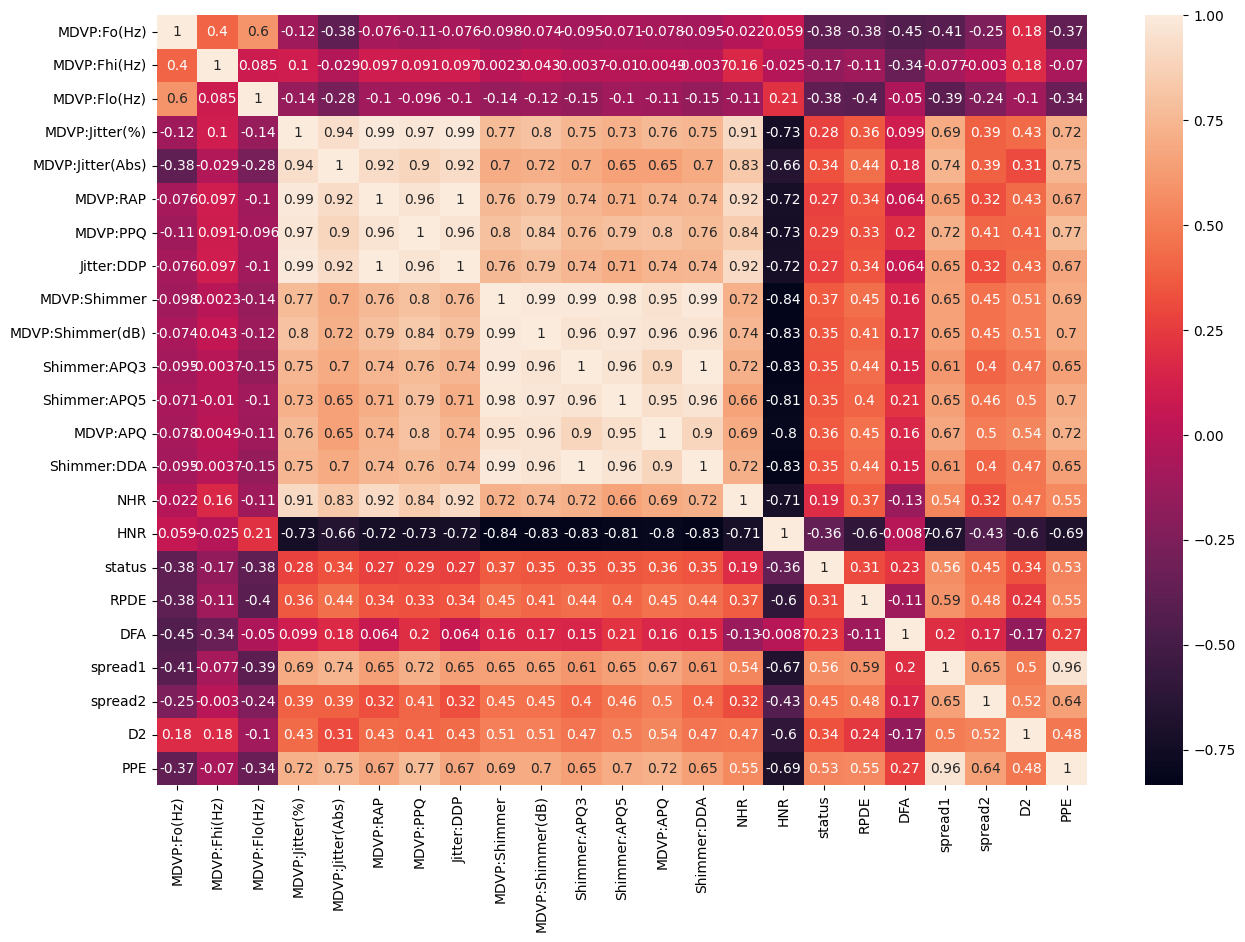

In [45]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

In [46]:
# from above matrix it is observed that some features are highly related so it is important to remove one of them as them both are showing similiar behaviour

In [47]:
corr_matrix = df.corr(numeric_only=True)
threshold = 0.85
high_corr_list = []
num = 1

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:  # Check correlation value
            high_corr_list.append((num, corr_matrix.columns[i], corr_matrix.columns[j], corr_value))
            num += 1
high_corr_df = pd.DataFrame(high_corr_list, columns=["Number", "Feature", "Related Feature", "Correlation"])

# Display the highly correlated feature pairs
high_corr_df

# Optionally, save to CSV
# high_corr_df.to_csv("highly_correlated_features.csv", index=False)

,Number,Feature,Related Feature,Correlation
0,1,MDVP:Jitter(Abs),MDVP:Jitter(%),0.935714
1,2,MDVP:RAP,MDVP:Jitter(%),0.990276
2,3,MDVP:RAP,MDVP:Jitter(Abs),0.922911
3,4,MDVP:PPQ,MDVP:Jitter(%),0.974256
4,5,MDVP:PPQ,MDVP:Jitter(Abs),0.897778
5,6,MDVP:PPQ,MDVP:RAP,0.957317
6,7,Jitter:DDP,MDVP:Jitter(%),0.990276
7,8,Jitter:DDP,MDVP:Jitter(Abs),0.922913
8,9,Jitter:DDP,MDVP:RAP,1.000000
9,10,Jitter:DDP,MDVP:PPQ,0.957319


In [48]:
# List of highly correlated features to remove
features_to_remove = [
    "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP",
    "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5",
    "MDVP:APQ", "Shimmer:DDA", "NHR"
]

# Drop these columns from the dataset
df_reduced = df.drop(columns=features_to_remove)

# Display new shape
print("Reduced dataset shape:", df_reduced.shape)

Reduced dataset shape: (195, 13)


In [49]:
df_reduced.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.04374,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.06134,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [50]:
corr_matrix_reduced=df_reduced.corr(numeric_only=True)
corr_matrix_reduced

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.098374,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,0.002281,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.144543,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.769063,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,1.000000,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
HNR,0.059144,-0.024893,0.210851,-0.728165,-0.835271,1.000000,-0.361515,-0.598736,-0.008665,-0.673210,-0.431564,-0.601401,-0.692876
status,-0.383535,-0.166136,-0.380200,0.278220,0.367430,-0.361515,1.000000,0.308567,0.231739,0.564838,0.454842,0.340232,0.531039
RPDE,-0.383894,-0.112404,-0.400143,0.360673,0.447424,-0.598736,0.308567,1.000000,-0.110950,0.591117,0.479905,0.236931,0.545886
DFA,-0.446013,-0.343097,-0.050406,0.098572,0.159954,-0.008665,0.231739,-0.110950,1.000000,0.195668,0.166548,-0.165381,0.270445
spread1,-0.413738,-0.076658,-0.394857,0.693577,0.654734,-0.673210,0.564838,0.591117,0.195668,1.000000,0.652358,0.495123,0.962435


## OUTLIER ANALYSIS
Outliers are data points that significantly deviate from the rest of the dataset. They can distort statistical analyses and affect machine learning models. Detecting and handling outliers is crucial for cleaning data and improving model accuracy.

In [51]:
# boxplots are used to identify outlier in our data visually

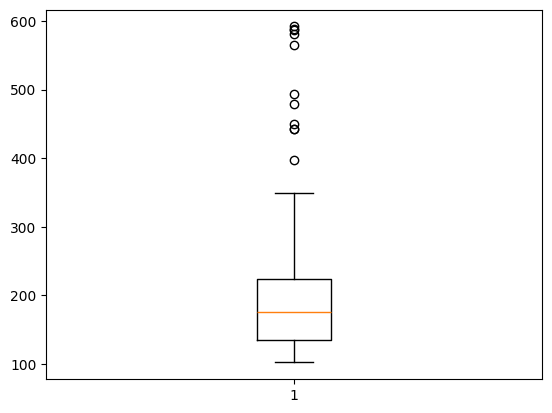

In [52]:
# columns wise boxplot
plt.boxplot(df_reduced['MDVP:Fhi(Hz)'])
plt.show()

In [53]:
# small bubble indicate the presence of outlier
# it is observed that there is presence of outlier in columns 'MDVP:Fhi(Hz)'

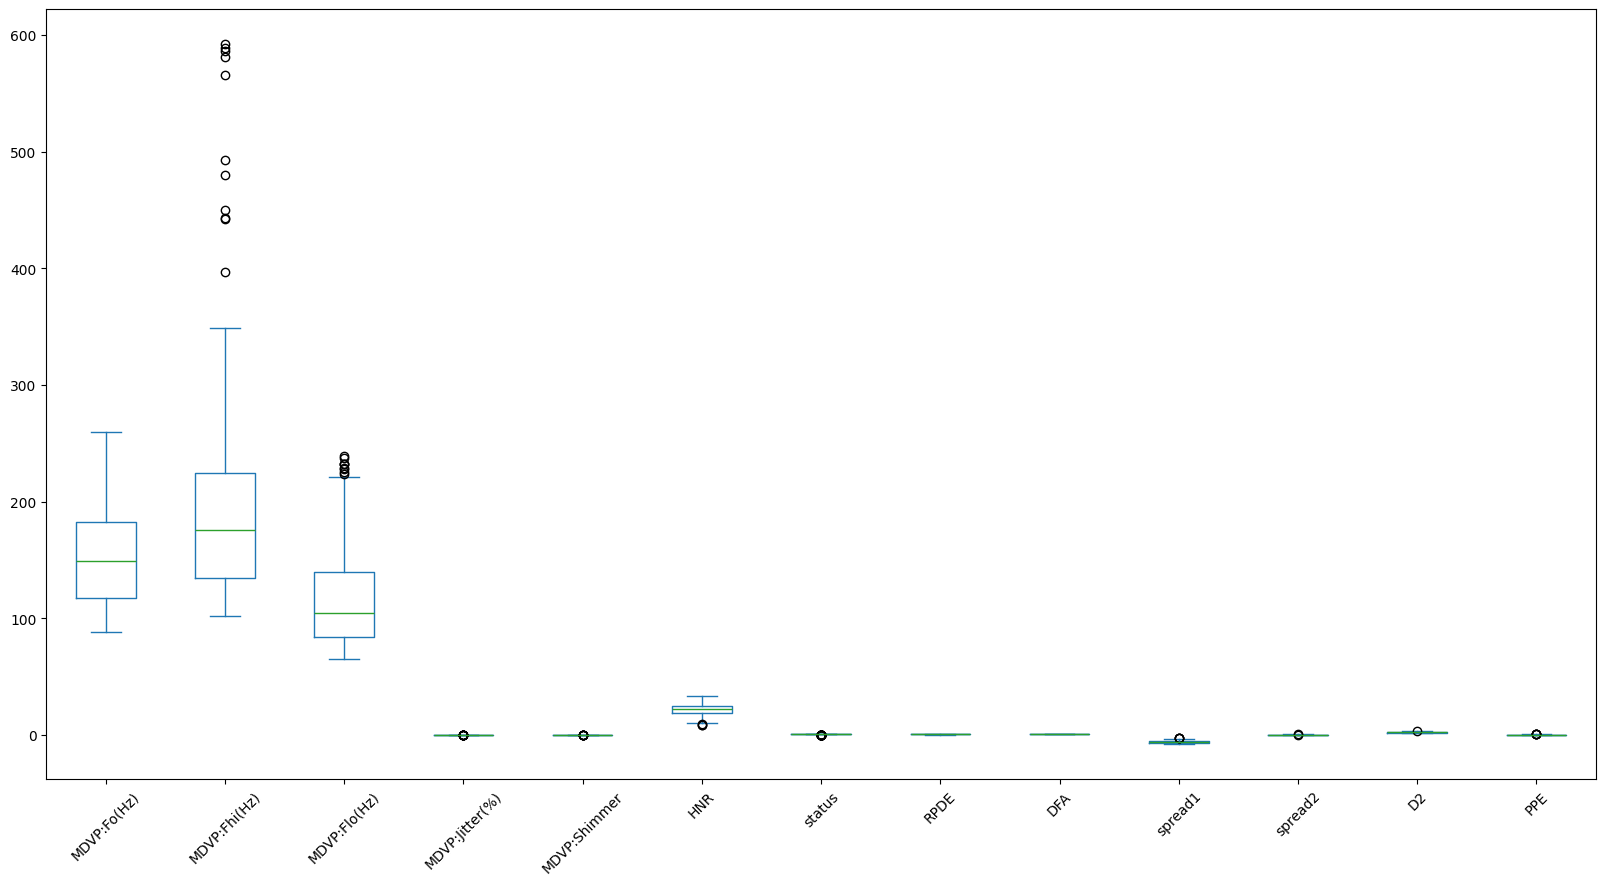

In [54]:
# column wise boxplot for entire data
df_reduced.plot(kind='box', figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

In [55]:
# it is observed that outliers are present in many col

In [56]:
# function is created for the identification of outliers
# function is designed to detect outliers in a given column using the Interquartile Range (IQR) method.
def identify_outliers(col_name):
    i=col_name
    # calculate quartiles
    Q1=round(np.quantile(df[i],0.25),2)
    Q2=round(np.quantile(df[i],0.50),2)
    Q3=round(np.quantile(df[i],0.75),2)
    # compute inter quartile range
    IQR=Q3-Q1
    # determine outlier bound
    upper_bound=Q3+(1.5*IQR)
    lower_bound=Q1-(1.5*IQR)
    # conditions to determine outlier
    cond1=df[i]>upper_bound
    cond2=df[i]<lower_bound
    # apply the conditions to find outlier
    outlier=df[i][cond1|cond2] #series
    # retrun dataframe with outlier
    outliers_data=outlier.values 
    return outliers_data

In [57]:
outliers_data_chol=identify_outliers('MDVP:Fhi(Hz)')
len(outliers_data_chol)
# no of outlier

11

In [58]:
df_reduced.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Shimmer', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2',
       'D2', 'PPE'],
      dtype='object')

In [59]:
# number of outlier in each col
for i in df_reduced.columns:
    li=identify_outliers(i)
    print(i,len(li))

MDVP:Fo(Hz) 0
MDVP:Fhi(Hz) 11
MDVP:Flo(Hz) 9
MDVP:Jitter(%) 4
MDVP:Shimmer 8
HNR 3
status 48
RPDE 0
DFA 0
spread1 4
spread2 1
D2 1
PPE 6


In [60]:
# this function retruns the data frame having no outlier for that particular col
def non_outlier_df(col_name):
    i=col_name
    Q1=round(np.quantile(df[i],0.25),3)
    Q2=round(np.quantile(df[i],0.50),3)
    Q3=round(np.quantile(df[i],0.75),3)
    IQR=Q3-Q1
    upper_bound=Q3+(1.5*IQR)
    lower_bound=Q1-(1.5*IQR)
    cond1=df[i]<=upper_bound
    cond2=df[i]>=lower_bound
    # both cond need to be true
    non_outlier=df[cond1&cond2]
    return non_outlier

In [61]:
# for the column name 'MDVP:Shimmer'
non_outlier_data=non_outlier_df('MDVP:Shimmer')

In [62]:
# this function retrun the plot for data containing outlier and data free from oulier
def plot_outlier_vs_non_outlier(col):
    i=col
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    plt.title('non outlier')
    plt.hist(non_outlier_data[i], bins=40)
    
    plt.subplot(2,2,2)
    plt.title('outlier data')
    plt.hist(df[i], bins=40)
    
    plt.subplot(2,2,3)
    plt.title('non outlier')
    plt.boxplot(non_outlier_data[i])
    
    plt.subplot(2,2,4)
    plt.title('outlier data')
    plt.boxplot(df[i])
    plt.show()

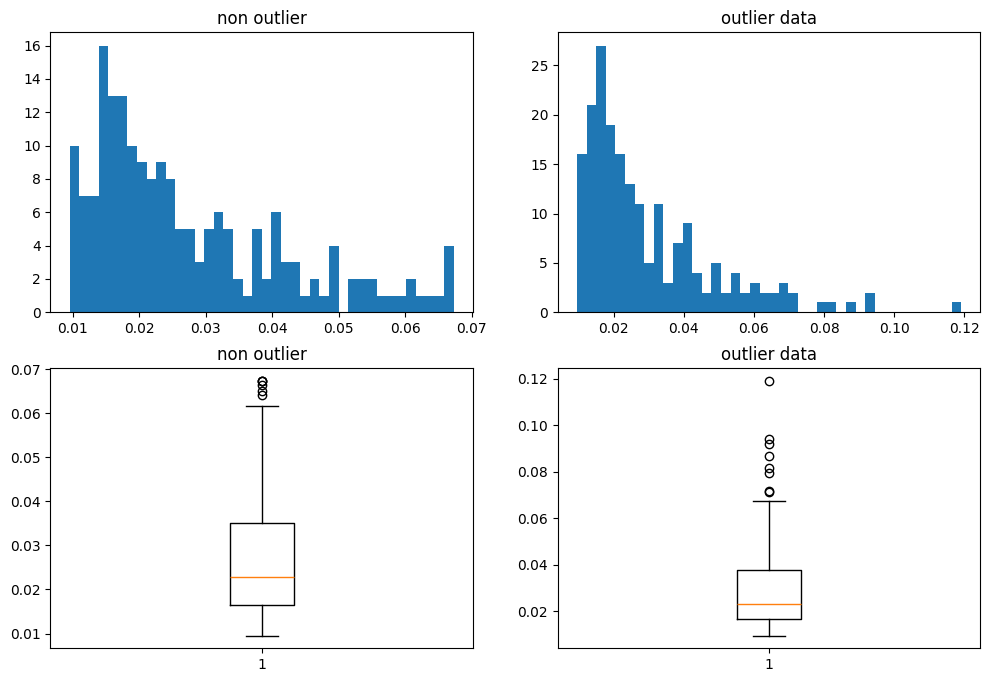

In [63]:
# for column name 'MDVP:Shimmer'
plot_outlier_vs_non_outlier('MDVP:Shimmer')

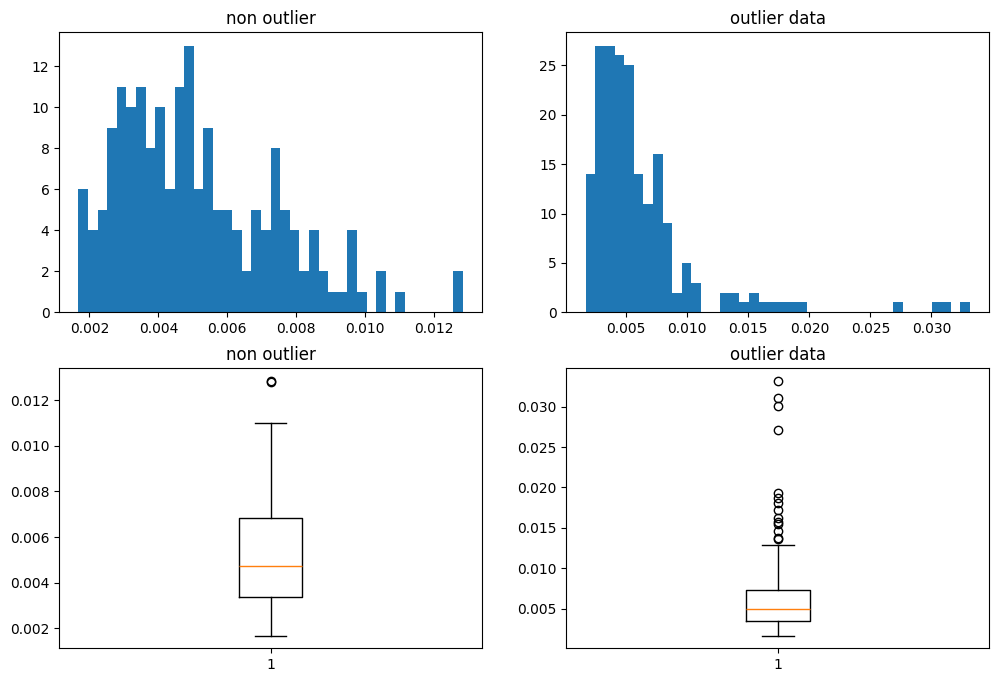

In [64]:
# call function with col name 'MDVP:Jitter(%)'
non_outlier_data=non_outlier_df('MDVP:Jitter(%)')
plot_outlier_vs_non_outlier('MDVP:Jitter(%)')

In [65]:
# function to remove the outliers passinf both dataframe and columns
# return the whole data frame free from outlier
def removeOutliers(df , cols):
    '''
    Removes outliers from multiple columns using the IQR method.
    '''
    # Create a copy to avoid modifying the original DataFrame
    df_cleaned = df.copy()
    for col in cols : 
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1 
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        df_cleaned = df_cleaned[(df_cleaned[col]>=lower_bound) & (df_cleaned[col]<=upper_bound)]
    return df_cleaned

In [66]:
# run function
parkinsonData = removeOutliers(df_reduced,df_reduced.columns)

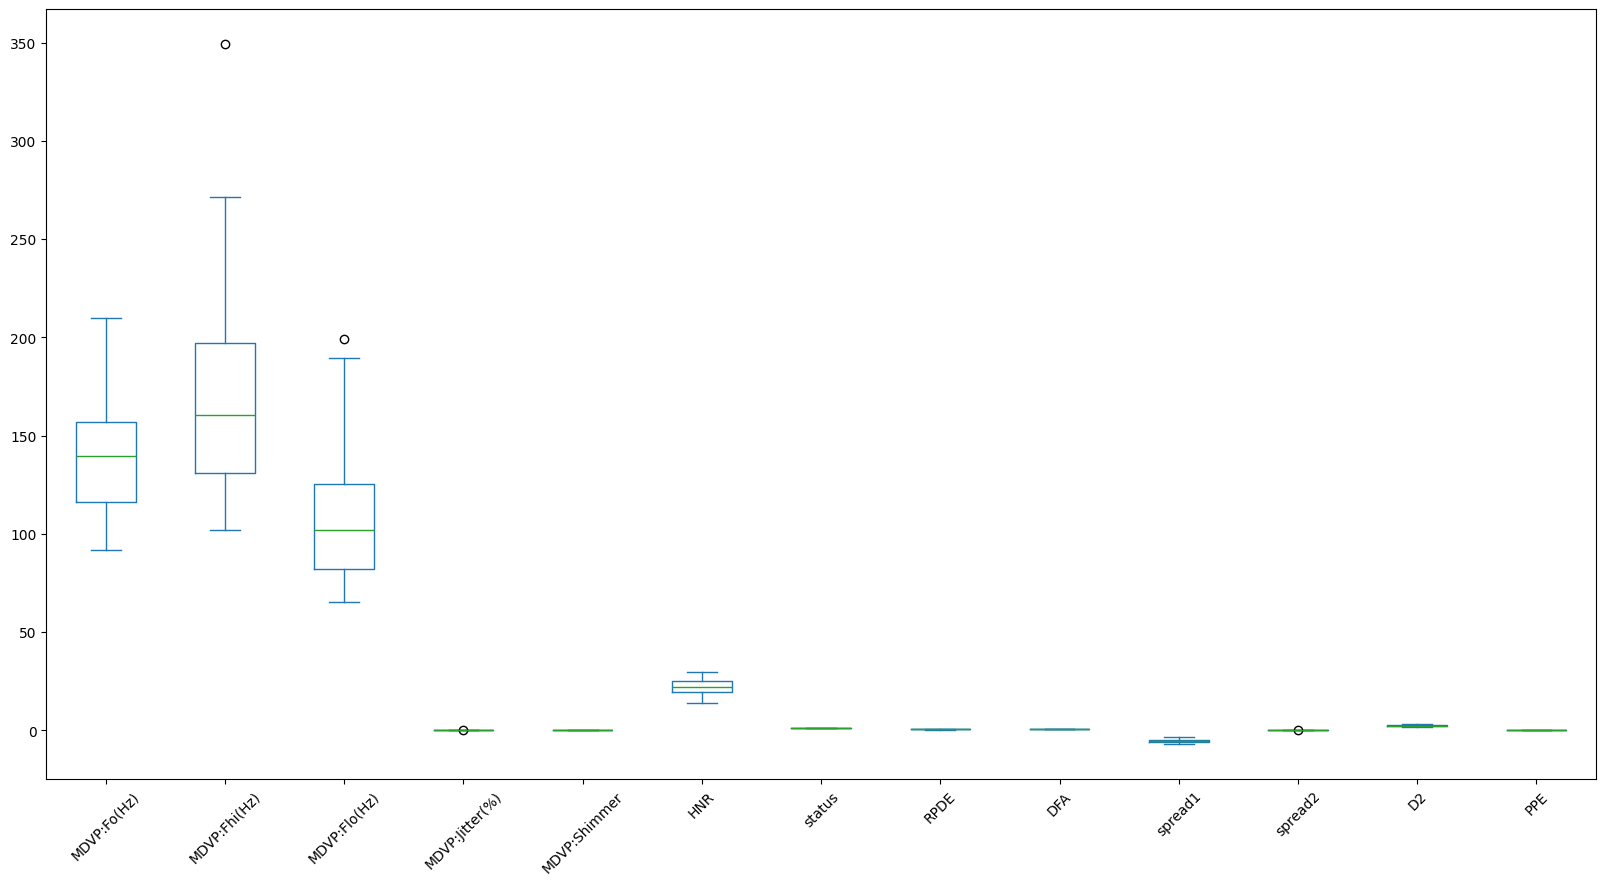

In [67]:
parkinsonData.plot(kind='box', figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

In [68]:
# number of outliers in data has been drastically reduced

In [69]:
parkinsonData2 = removeOutliers(parkinsonData, parkinsonData.columns)

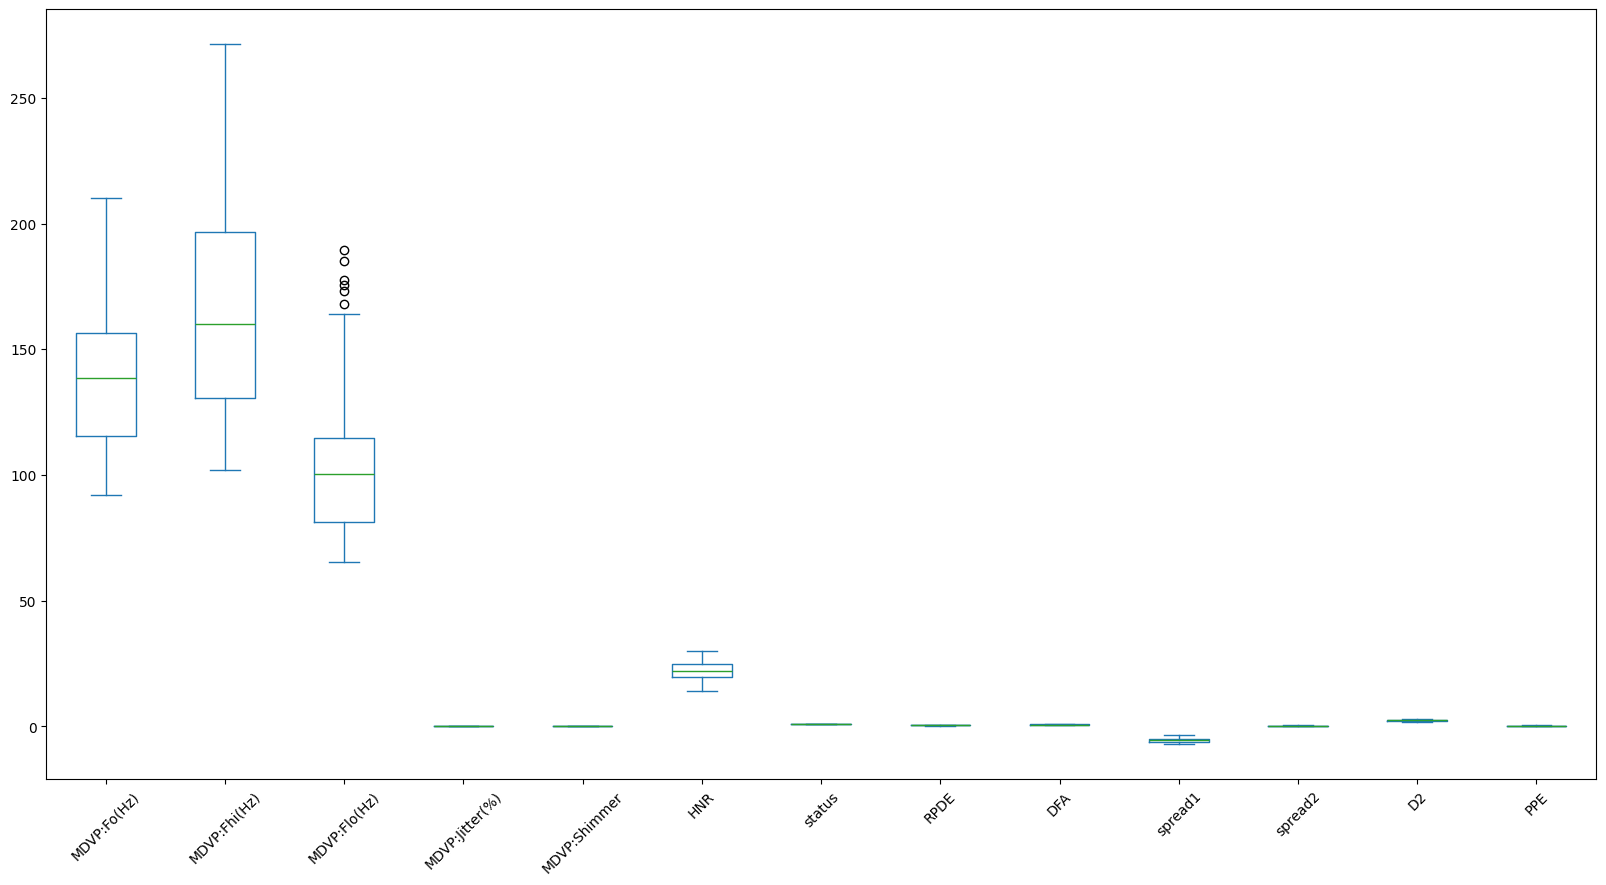

In [70]:
parkinsonData2.plot(kind='box', figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

In [71]:
# number of outliers in data has been drastically reduced

### VISUALIZATION

In [72]:
df_reduced.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Shimmer', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2',
       'D2', 'PPE'],
      dtype='object')

### Histogram 
To see the distribution of numerical features

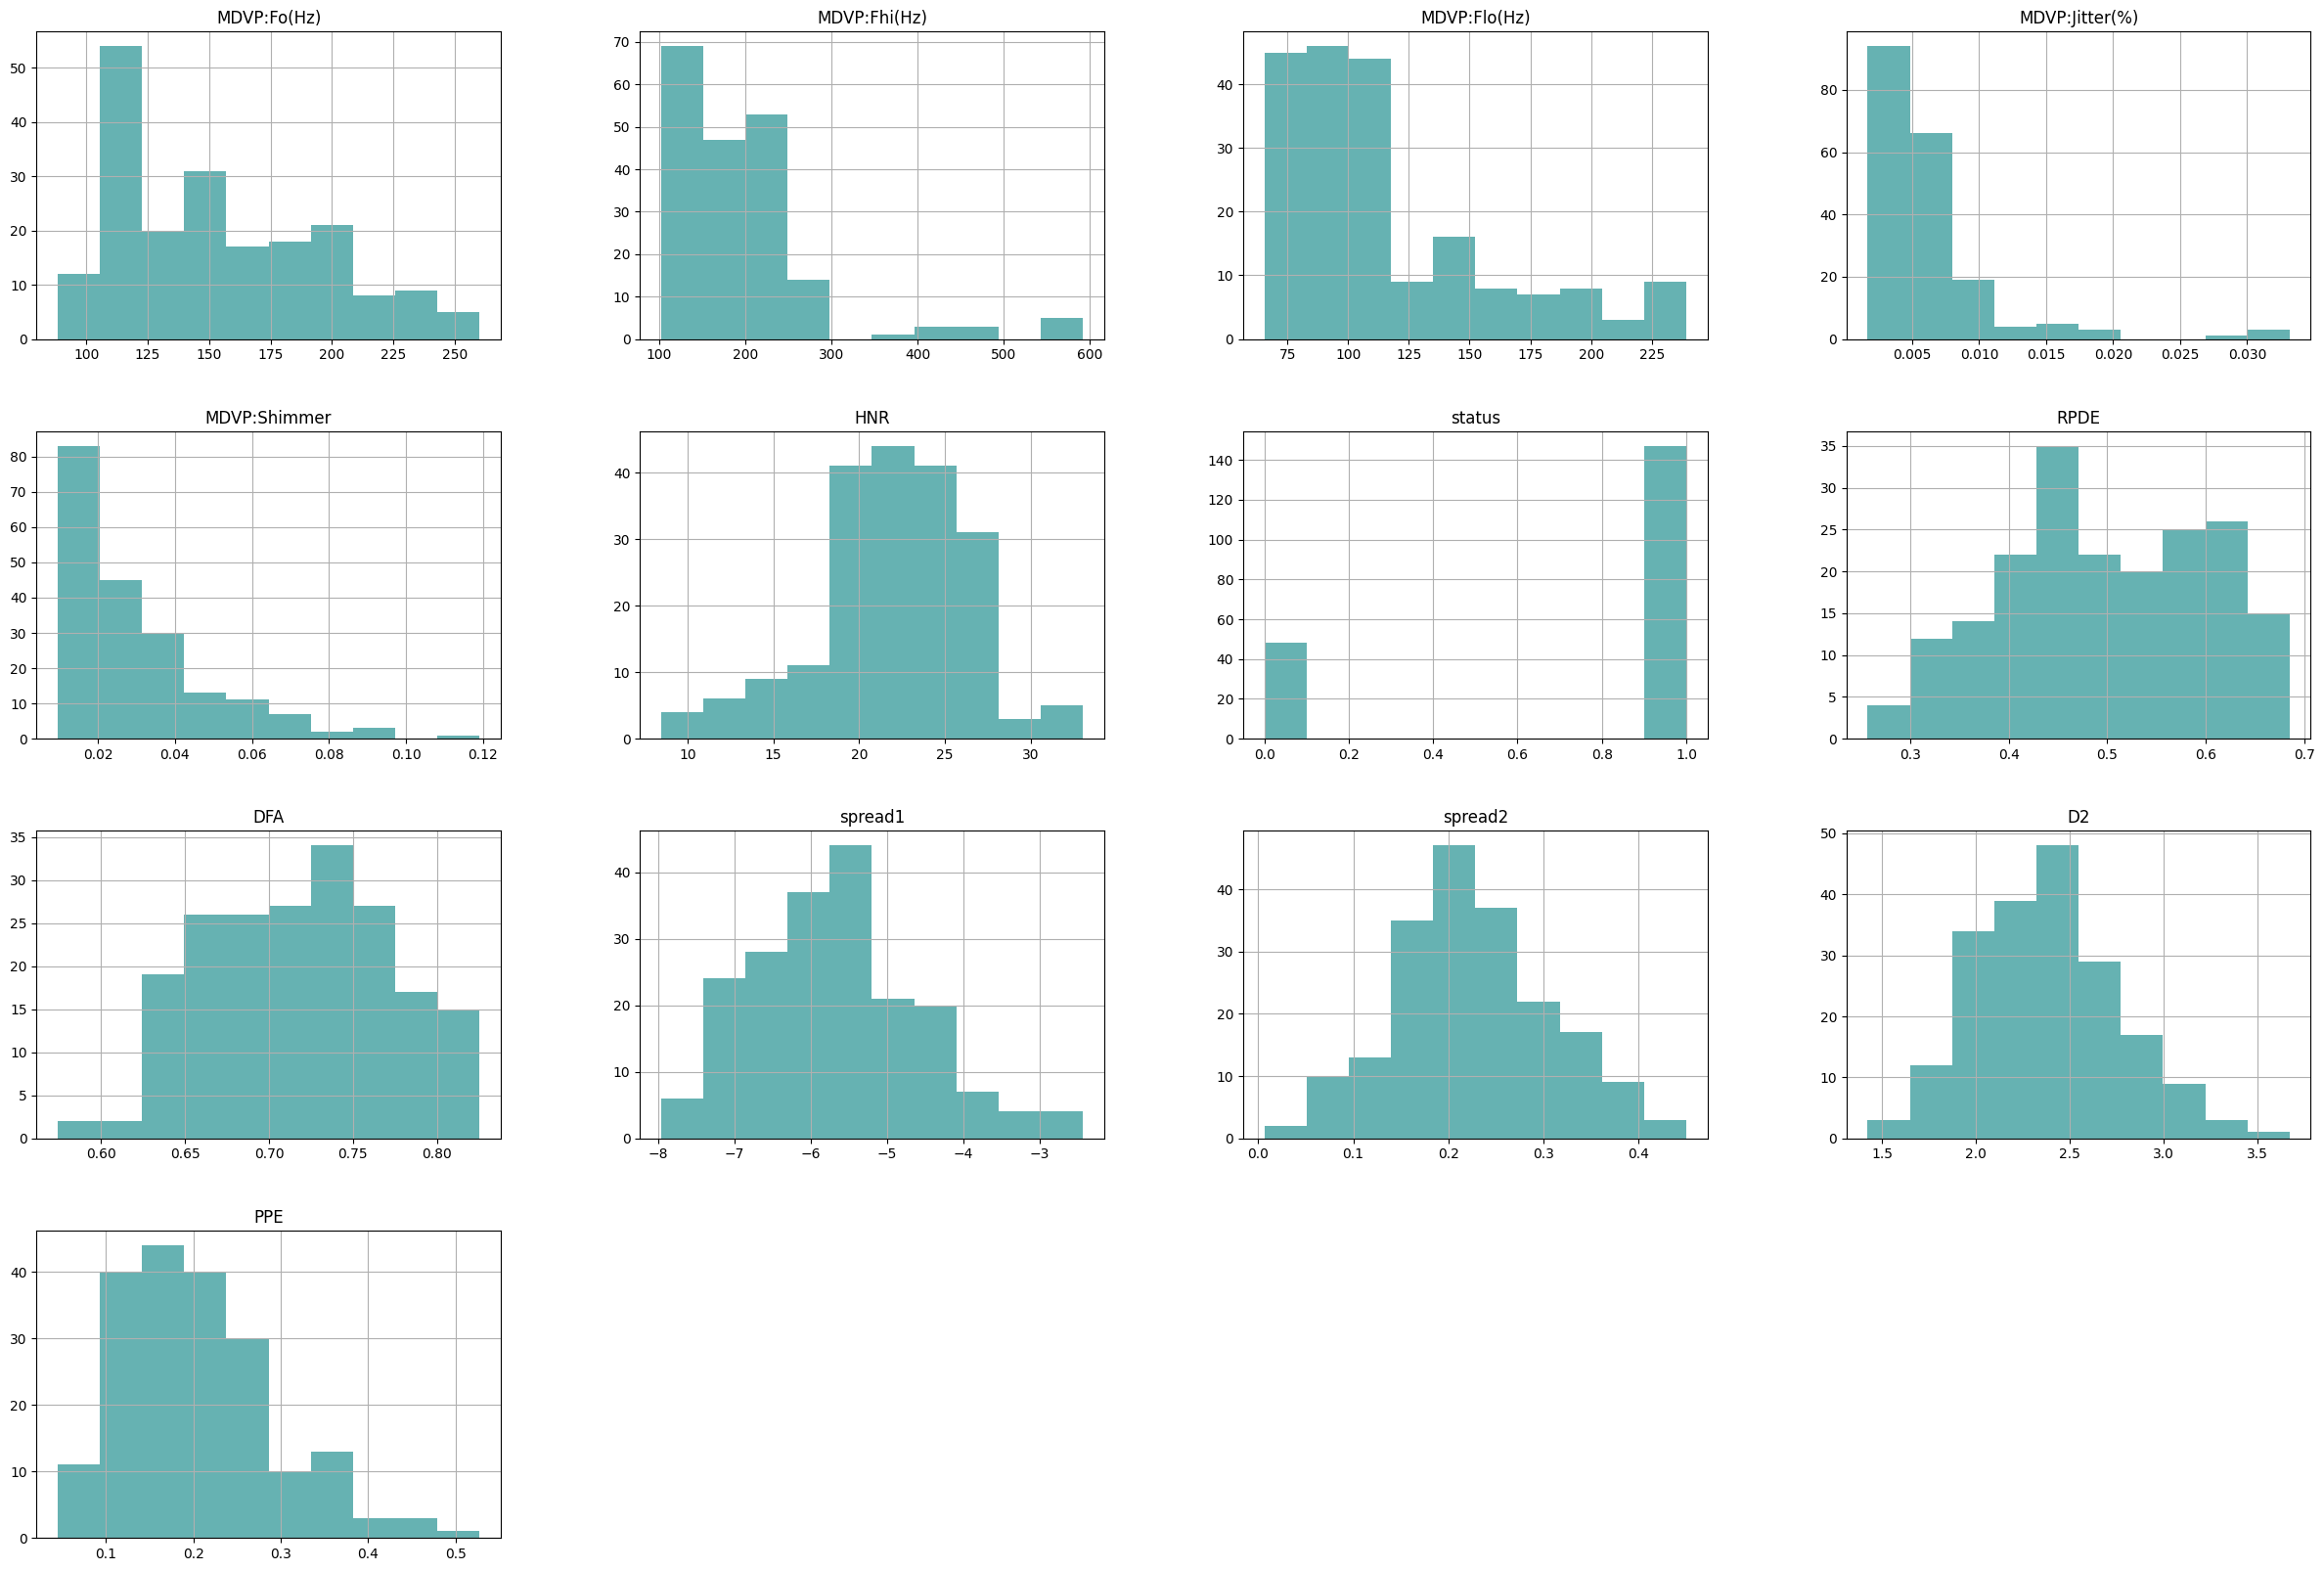

In [73]:
df_reduced.hist(figsize=(30,20),color='teal',alpha=0.6)
plt.show()

### Outcome Variable Distribution

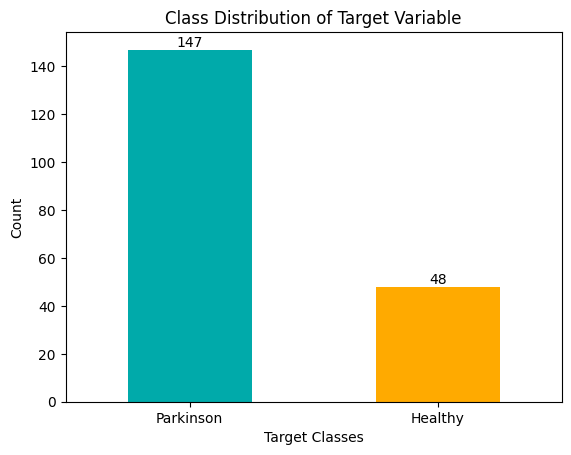

In [74]:
ax = df_reduced['status'].value_counts().plot(kind='bar', color=['#00aaaa', '#ffaa00'])

# Set title and labels
plt.title('Class Distribution of Target Variable')
plt.xlabel('Target Classes')
plt.ylabel('Count')

# Rename x-axis labels
ax.set_xticklabels(['Parkinson', 'Healthy'], rotation=0)
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

### Heatmap 
To visualize missing values

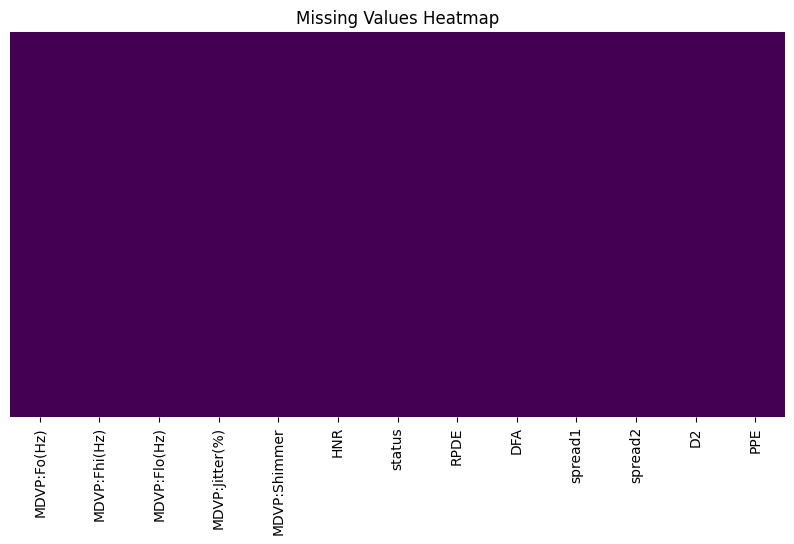

In [75]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_reduced.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### Correlation Heatmap 
To identify relationships between variables

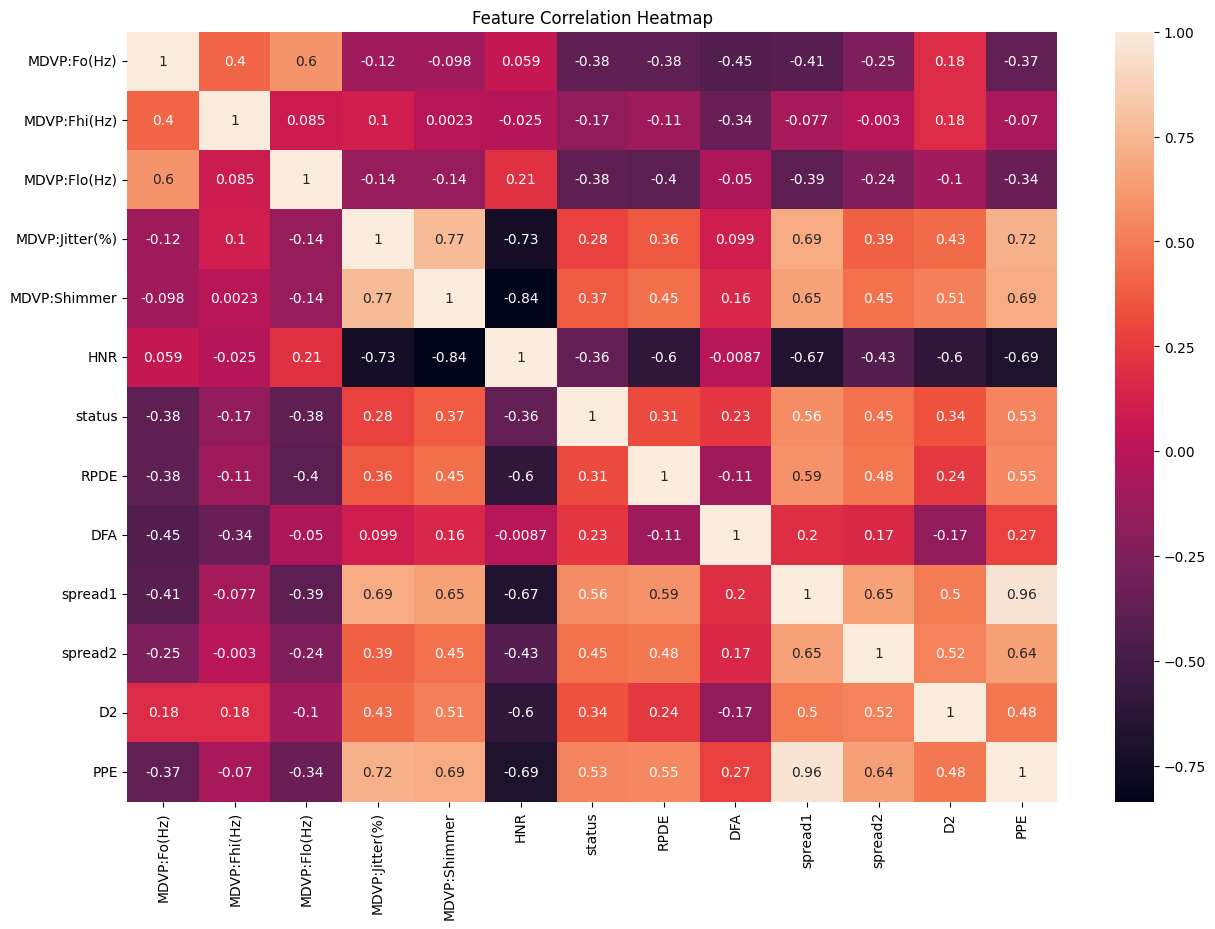

In [76]:
corr_matrix=df_reduced.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [77]:
parkinson_svm=df.copy()

In [78]:
parkinson_svm.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [79]:
parkinson_svm['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [80]:
parkinson_svm.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [81]:
X = parkinson_svm.drop(columns=['status'], axis=1)
Y = parkinson_svm['status']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [84]:
model = svm.SVC(kernel='linear')

In [85]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [86]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [87]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


In [88]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


C:\Users\91876\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [89]:
import pickle

In [90]:
filename_db='parkinson.sav'

In [91]:
pickle.dump(model, open(filename_db,'wb'))

In [92]:
# loading the saved model
loaded_parkinson_model=pickle.load(open('parkinson.sav', 'rb'))

In [93]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = model.predict(input_data_reshaped)

prediction = loaded_parkinson_model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


C:\Users\91876\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
